Python for Data Science

    During this workshop we will give an intro to 
    Reading in a dataset using Pandas
    Data manupulation using Pandas
    Inroduction/conversion to numpy
    simple visualizations
What is Annaconda?
    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Numpy and pandas are the premire data science packages for python.
The purpose of Pandas is because it brings in the functionality of a dataframe
This gives us a fast way to work with relational, or labeled data.
Let us look at how the basis of pandas works.

        Note: even though I will be mainly using Pandas for this exersize
        Pandas is actually built on top of Numpy
        Meaning a vast majority of the functions we will be covering,
        can be used just as easily in numpy
        
        To explain the differences between the two:
            Numpy is used for creating Arrays - These arrays can be any number of dimensions, but 
            they do not have column or index labels - Numpy is essentially a more efficient version
            of the List in Python.
            Pandas is used for dataframes - This is more organized data that has column names AND an
            index.  It is Numpy with a more mandatory structure.

In [2]:
csv_file = "cars.csv"
df = pd.read_csv(csv_file)
print(df)
#as we can see below, we have a dataframe, where we have labeled columns, and numbered rows.  
#This will allow us to quickly isolate rows or columns and perform operations on them quickly 

      City mpg          Classification          Driveline  \
0           18  Automatic transmission    All-wheel drive   
1           22  Automatic transmission  Front-wheel drive   
2           21     Manual transmission  Front-wheel drive   
3           21  Automatic transmission    All-wheel drive   
4           21  Automatic transmission    All-wheel drive   
5           16     Manual transmission    All-wheel drive   
6           17  Automatic transmission    All-wheel drive   
7           13  Automatic transmission    All-wheel drive   
8           14  Automatic transmission    All-wheel drive   
9           22     Manual transmission    All-wheel drive   
10          21  Automatic transmission    All-wheel drive   
11          17  Automatic transmission    All-wheel drive   
12          20  Automatic transmission  Front-wheel drive   
13          18  Automatic transmission    All-wheel drive   
14          12  Automatic transmission    All-wheel drive   
15          12  Automati

The first manipulation we would want to make is only select columns we may want to work with, and ignore columns we do not. 

In [3]:
df_simp = df[["ID", "Highway mpg", "Horsepower", "Make", "Torque", "Year"]]
print(df_simp)

                                                   ID  Highway mpg  \
0                                    2009 Audi A3 3.2           25   
1                               2009 Audi A3 2.0 T AT           28   
2                                  2009 Audi A3 2.0 T           30   
3                          2009 Audi A3 2.0 T Quattro           28   
4                          2009 Audi A3 2.0 T Quattro           28   
5                                    2009 Audi A5 3.2           27   
6                                 2009 Audi A5 3.2 AT           26   
7                                    2009 Audi Q7 4.2           18   
8                                    2009 Audi Q7 3.6           20   
9                    2009 Audi A4 Sedan 2.0 T Quattro           30   
10                2009 Audi A4 Sedan 2.0 T Quattro AT           27   
11                             2009 Audi A4 Sedan 3.2           26   
12                                      2012 Acura TL           29   
13                  

In [50]:
#To make our data more viewable, we will use the function dataframe.sort_values
#With this, we can first sort by make in alphabetic order (with the true flag), then sort HP and
#Highway MPG greatest to least, or reverse order, by setting ascending = to false!
df_simp = df_simp.sort_values(["Make", "Horsepower", "Highway mpg"], ascending=[True, False, False])
print(df_simp)
#look how readable our results are!

                                                     ID  Highway mpg  \
3686           2011 Chevrolet Silverado 1500 Hybrid 1HY          223   
4684                      2012 Volkswagen Passat TDI SE           43   
1505                           2012 Chevrolet Cruze Eco           42   
1517                           2011 Chevrolet Cruze Eco           42   
384   2011 Volkswagen Jetta SportWagen TDI Clean Diesel           42   
918        2011 Volkswagen Golf TDI Clean Diesel 2-Door           42   
927        2011 Volkswagen Golf TDI Clean Diesel 4-Door           42   
4610                          2012 Volkswagen Jetta TDI           42   
4616               2012 Volkswagen Jetta SportWagen TDI           42   
4763                    2012 Volkswagen Golf TDI 2-Door           42   
4765             2012 Volkswagen Golf 4-Door TDI 4-Door           42   
4731                          2012 Honda Civic HF Sedan           41   
317              2010 Volkswagen Jetta TDI Clean Diesel         

In [5]:
#Lets say we want to quickly access data from only a specific make.
#we can do this by getting seperate dataframes just for the Makes we want!
#In fact, we can take it a step further, and organize this data into a dictionary of dataframes!
#This will give us seperate dataframes for ALL makes!  
#first we are going to make a list of all makes found in our data
makes = df_simp.Make.unique()
#now, for each make in our makes list, we are associating its name with an empty pandas dataframe
df_dict = {make : pd.DataFrame for make in makes} #This is a tricky statement
#Finally, for each key in our dictionary (each make) we are adding a split of the dataframe
#Where the row is only included if the make = the key
for key in df_dict.keys():
    df_dict[key] = df_simp[:][df_simp.Make == key]
    #Reindexing each split so that all of our indexes start at 0!
    df_dict[key].reset_index(drop=True, inplace=True)
#Lets make sure this worked as expected
print(makes) #Here is a list of all of our different makes
print(df_dict["Audi"]) #Here we can easily go into our dictionary and pull out all data on Audis

['AMG' 'Acura' 'Aston Martin' 'Audi' 'BMW' 'BMW Motorrad' 'Bentley'
 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Chrysler Group LLC' 'Dodge'
 'Ferrari' 'Ford' 'GMC' 'Grand Cherokee' 'Honda' 'Hyundai' 'Infiniti'
 'Jaguar' 'Jeep' 'Kia' 'Lamborghini' 'Land Rover' 'Lexus' 'Lincoln'
 'Lotus' 'MINI' 'Maserati' 'Maybach' 'Mazda' 'Mercedes' 'Mercedes-AMG'
 'Mercedes-Benz' 'Mercury' 'Mitsubishi' 'Nissan' 'Porsche' 'Rolls-Royce'
 'Saab' 'Scion' 'Subaru' 'Suzuki' 'Toyota' 'Volkswagen' 'Volvo']
                                      ID  Highway mpg  Horsepower  Make  \
0                 2010 Audi R8 Coupe 5.2           20         525  Audi   
1                 2011 Audi R8 Coupe 5.2           19         525  Audi   
2                 2012 Audi R8 Coupe 5.2           19         525  Audi   
3                2011 Audi R8 Spyder 5.2           19         525  Audi   
4                2012 Audi R8 Spyder 5.2           19         525  Audi   
5                       2012 Audi A8 W12           21         5

Now we are going to move into Visualizing and Analyzing our data!

    for this, we will be using a relatively new data vizualization package called Seaborn
    If you are familiar with Matplotlib, it is similar, but the difference is something that 
    takes 10 lines in matplotlib, can be done in 1 with seaborn, making it ideal for super 
    quick and easy visualizations.  To make it even better, its built to work with Pandas!
    Lets look at the example below to see how we can make a plot with a line of best fit
    In fact, it actually inherits a lot of what it does from matplotlib
    For example, in order to change the title, we will be calling a matplotlib function, not a 
    seaborn one!  

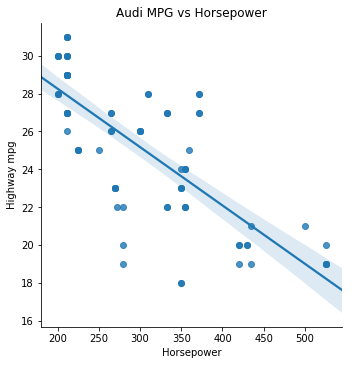

In [45]:
#so we renamed seaborn as sns.  Now let is call sns.lmplot, which stands for linear model plot
#It will include both our X and Y scatterplot, and automatically 
g = sns.lmplot(x="Horsepower", y="Highway mpg", data=df_dict["Audi"], legend="full")
t = plt.title('Audi MPG vs Horsepower')
#As you can see, we created a beautiful viz with only 1 line of code, and needed   
# one more to add a title!  That is powerful.

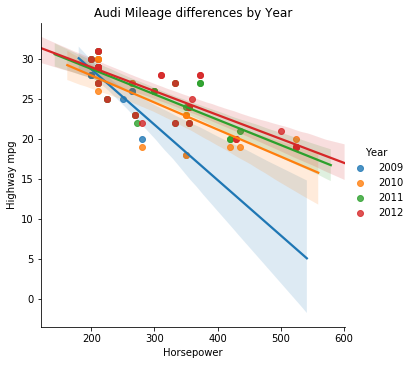

In [48]:
#But wait, seaborn has more.  Lets say instead of 1 line of best fit, we want to see how
#mileage improves as years pass.  This can easily be done with "Hue" which will color our 
#graph easily based on a categorical variable.  
g = sns.lmplot(x="Horsepower", y="Highway mpg", hue="Year", data=df_dict["Audi"], legend="full")
t = plt.title('Audi Mileage differences by Year')
#In addition, lets learn how to save this graph!
g.savefig('Audi_diff_by_year.png')
#This graph makes it clear to see that as years go on, mileage improves regardless of horsepower!

Seaborn doesn't just make scatterplots!  it has over 30 different plots!

        To play with the boxplot functionaility, lets look at the example below
        Where we will look at the difference in Horsepower from some top brands

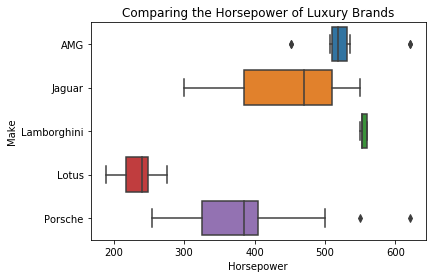

In [49]:
#Plotting all brands would not create a good looking plot. lets fix that!
#Let us take the dataframe we used before creating the dictionary
#We will then index into the Make column of that dictionary, and only keep the row
#if the Make is found in the list I have specified!  This brings us to having a set 
#of only these 5 luxury brands!
df_simp2 = df_simp.loc[df['Make'].isin(['AMG', 'Lamborghini', 'Porsche', 'Lotus', 'Jaguar'])]
g = sns.boxplot(x="Horsepower", y="Make", data=df_simp2)
t = plt.title('Comparing the Horsepower of Luxury Brands')
#As you can see here, AMG and Lamborghini have the most consistently fast cars, while lotus lags behind
#We can also see that jaguar and porsche appeal to many different consumers with a wide array 

In [32]:
#Finally, what if in addition to colorful graphs, we want to know more about our data?
#Pandas again, comes to the rescue and makes it fairly simple to collect numbers
all_stats = df_simp.describe()
df_simp.describe()
#As you can see, this aggregates all of our car data, and tells us about it in general.
#What if we want to drilldown by a specific brand?  Well that is why we have our df_dict data.

,Highway mpg,Horsepower,Torque,Year
count,5076.000000,5076.000000,5076.000000,5076.000000
mean,24.125493,270.499409,272.707250,2010.867612
std,6.488293,95.293537,100.123328,0.782951
min,11.000000,100.000000,98.000000,2009.000000
25%,20.000000,190.000000,187.000000,2010.000000
50%,24.000000,266.000000,260.000000,2011.000000
75%,28.000000,317.000000,335.000000,2011.000000
max,223.000000,638.000000,774.000000,2012.000000


In [33]:
#Lets look again at Audi to further analyze their data
audi_stats = df_dict["Audi"].describe()
df_dict["Audi"].describe()
#This is cool and all, but I need something to compare it to!

,Highway mpg,Horsepower,Torque,Year
count,87.000000,87.000000,87.000000,87.000000
mean,25.172414,300.183908,297.908046,2010.701149
std,3.757804,93.310874,57.281969,1.057805
min,18.000000,200.000000,207.000000,2009.000000
25%,22.000000,211.000000,258.000000,2010.000000
50%,26.000000,280.000000,310.000000,2011.000000
75%,28.000000,354.000000,325.000000,2012.000000
max,31.000000,525.000000,463.000000,2012.000000


In [40]:
#So say we want to further analyze the data by figuring out how Audi compares to the average car
#In Pandas, if 2 dataframes or columns match, pandas will automatically just subtract each one in order
stat_differential = audi_stats - all_stats
#Since the means will tell us the most, let us select the mean column and print it!
print(stat_differential.loc["mean"])
#This simply tells us on average Audis had 1 more MPG, 30 more HP and 25 more Torque!
#That is pretty good news for Audi!
#What could be the reason??? 2 possibilities - higher quality/better engines, or smaller cars?

Highway mpg     1.046921
Horsepower     29.684499
Torque         25.200796
Year           -0.166463
Name: mean, dtype: float64


This concludes the lesson

        In this we went through
            The basics of filtering in Pandas
            Syntax for numpy and pandas
            Advanced dataframe creation techniques
            Beautiful vizualizations using Seaborn
            Computing Statistics in Pandas